<a href="https://colab.research.google.com/github/carlosmvond/bayes-curso/blob/main/U1_HDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El intervalo de mayor densidad (HDI, por sus siglas en inglés) es un intervalo de confianza que contiene los valores más probables de una distribución de probabilidad. Se define como el rango de valores en el cual se concentra un porcentaje específico de la distribución, indicando la región en la que es más probable que se encuentre el parámetro desconocido.

Para un HDI del $\alpha\%$, el intervalo se calcula de tal manera que la probabilidad de que el parámetro verdadero esté dentro del intervalo sea igual a $\alpha$. Por ejemplo, un HDI del 95\% indica que hay un 95\% de probabilidad de que el parámetro se encuentre dentro de ese intervalo.

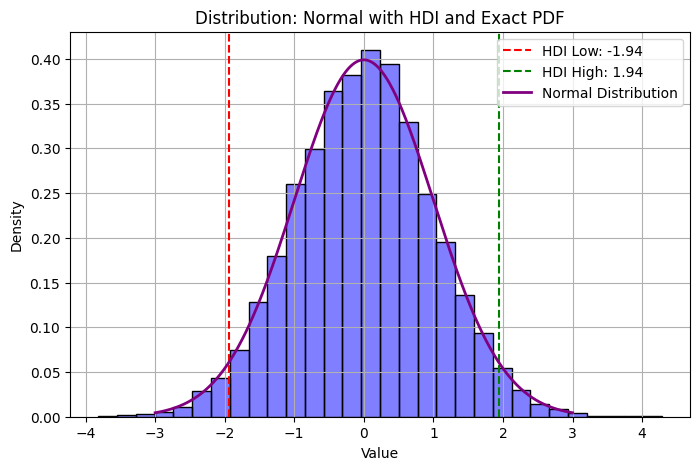

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform, expon, beta

# Function to generate data based on the chosen distribution
def generate_data(distribution, **params):
    if distribution == 'normal':
        return np.random.normal(loc=params.get('mean', 0), scale=params.get('std', 1), size=params.get('size', 10000))
    elif distribution == 'uniform':
        return np.random.uniform(low=params.get('low', 0), high=params.get('high', 1), size=params.get('size', 10000))
    elif distribution == 'exponential':
        return np.random.exponential(scale=params.get('scale', 1), size=params.get('size', 10000))
    elif distribution == 'beta':
        return np.random.beta(a=params.get('a', 2), b=params.get('b', 5), size=params.get('size', 10000))
    else:
        raise ValueError("Unsupported distribution")

# Choose a distribution: 'normal', 'uniform', 'exponential', 'beta'
chosen_distribution = 'normal'  # Change this to switch distributions

# Parameters for the chosen distribution
params = {
    'normal': {'mean': 0, 'std': 1, 'size': 10000},
    'uniform': {'low': 0, 'high': 1, 'size': 10000},
    'exponential': {'scale': 1, 'size': 10000},
    'beta': {'a': 2, 'b': 5, 'size': 10000},
}

# Generate data based on the chosen distribution
data = generate_data(chosen_distribution, **params[chosen_distribution])

# Set up the plot
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, stat="density", color='blue', alpha=0.5)

# Calculate the HDI
alpha = 0.95  # Change this to modify the HDI width
hdi_low, hdi_high = np.percentile(data, [(1-alpha)*100/2, (1+alpha)*100/2])

# Plot the HDI vertical lines
plt.axvline(hdi_low, color='red', linestyle='--', label=f'HDI Low: {hdi_low:.2f}')
plt.axvline(hdi_high, color='green', linestyle='--', label=f'HDI High: {hdi_high:.2f}')

# Define the range for plotting the exact distribution
x = np.linspace(-3, 3, 1000)  # Adjust the range based on the chosen distribution

# Plot the exact distribution based on the chosen distribution
if chosen_distribution == 'normal':
    pdf = norm.pdf(x, loc=params['normal']['mean'], scale=params['normal']['std'])
    plt.plot(x, pdf, color='purple', label='Normal Distribution', linewidth=2)
elif chosen_distribution == 'uniform':
    pdf = uniform.pdf(x, loc=params['uniform']['low'], scale=params['uniform']['high'] - params['uniform']['low'])
    plt.plot(x, pdf, color='purple', label='Uniform Distribution', linewidth=2)
elif chosen_distribution == 'exponential':
    pdf = expon.pdf(x, scale=params['exponential']['scale'])
    plt.plot(x, pdf, color='purple', label='Exponential Distribution', linewidth=2)
elif chosen_distribution == 'beta':
    x = np.linspace(0, 1, 1000)  # Beta distribution is only defined between 0 and 1
    pdf = beta.pdf(x, a=params['beta']['a'], b=params['beta']['b'])
    plt.plot(x, pdf, color='purple', label='Beta Distribution', linewidth=2)

# Add labels and title
plt.title(f'Distribution: {chosen_distribution.capitalize()} with HDI and Exact PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Show the plot
plt.show()


